# Project 1: SAT & ACT Analysis

**Problem statement:** Considering the SAT and ACT scores through 2017 & 2018 with the data provided, a thorough analysis was made to discover which state should receive help to improve SAT participation rates.

### Executive Summary

**Description of data:** SAT and ACT data sets for 2017 and 2018

***Size:*** Data from 50 states and DC

**Sources:**
- [2017 ACT Scores](./data/act_2017.csv)
- [2017 SAT Scores](./data/sat_2017.csv)
- [2018 ACT Scores](./data/act_2018.csv)
- [2018 SAT Scores](./data/sat_2018.csv)

***Primary Findings:*** SAT participation rates were increased, which is a crucial point on finding and applying the decisions on budgeting through data analysis. 



### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [516]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [517]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [518]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [519]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 
## The ACT and SAT data above belongs to the official results in 2017 for every state in the USA. 
### SAT exam consists of 3 different scores:
- Evidence-Based Reading and Writing 
- Math
- Total

### ACT exam consists of 5 different score:
- English
- Math
- Reading
- Science
- Composite

Both of the exams have a different evaluation system that uses different score parameters to calculate the success of the individuals.

Both of the data includes a participation column to point out the percentage of all the available individuals who participated in the specified exam type.

#### 4a. Does the data look complete? 

Answer: 
It does look complete in terms of the values and scores in each individual state. But the SAT exam scores are missing the nation-wide score aggregation.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

###### The range of possible values for SAT is:
- 200-800 for both Math and Evidence-Based Reading and Writing. Making Total range between 400-1600.

###### For ACT:
- The scores can range between 1-36 for every section. Composite is just an average of all the scores.

There are several issues with the scores:
- SAT Maryland Math scores
- ACT Maryland Science scores
- ACT Wyoming Composite scores

In [520]:
sat_2017[(~sat_2017['Math'].between(200, 800))]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [521]:
act_2017['Science'].sort_values(ascending=True).head(3)

21     2.3
29    18.2
25    18.8
Name: Science, dtype: float64

In [522]:
act_2017.info() # Composite column expected to be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [523]:
act_2017['Composite'].tail()

47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [524]:
sat_2017['Math'] = sat_2017['Math'].replace(52,524)

In [525]:
act_2017['Science'] = act_2017['Science'].replace(2.3, 23.2)

#### 5. What are your data types? 
Display the data types of each feature. 

In [526]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [527]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Yes, the participation column for both dataframes must be of data type integer. Also the composite column in act_2017 is expected to be of data type float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [528]:
def fix_data(data):
    return int(data.replace('%', ''))

In [529]:
act_2017.loc[:, 'Participation'] = act_2017['Participation'].map(fix_data)

In [530]:
sat_2017.loc[:, 'Participation'] = sat_2017['Participation'].map(fix_data)

- Fix any individual values preventing other columns from being the appropriate type.

In [531]:
act_2017['Composite'] = act_2017['Composite'].str.replace('x', '').astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [532]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [533]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [534]:
sat_2017.rename(columns={'State' : 'state', 'Participation' : 'sat_17_participation', 'Evidence-Based Reading and Writing' : 'sat_17_ebraw', 'Math' : 'sat_17_math', 'Total' : 'sat_17_total'}, inplace=True)

In [535]:
act_2017.rename(columns={'State' : 'state', 'Participation' : 'act_17_participation', 'English' : 'act_17_english', 'Math' : 'act_17_math', 'Reading' : 'act_17_reading', 'Science' : 'act_17_science', 'Composite' : 'act_17_composite'},  inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [536]:
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [537]:
#code
act_2017.drop(index=0, axis=0,inplace=True)

In [538]:
act_2017.reset_index(drop='index',inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [539]:
#Code:
results_2017 = pd.merge(sat_2017, act_2017, on='state')

In [540]:
results_2017.head()

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [541]:
#code
results_2017.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [542]:
# Reading both act_2018 and sat_2018 csv files to dataframes
act_2018 = pd.read_csv('../data/act_2018.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')

Reading in 2018 data for both exams.

In [543]:
act_2018.tail()

,State,Participation,Composite
47,Virginia,24%,23.9
48,Washington,24%,22.2
49,West Virginia,65%,20.3
50,Wisconsin,100%,20.5
51,Wyoming,100%,20.0


In [544]:
sat_2018.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,68%,567,550,1117
47,Washington,69%,543,538,1081
48,West Virginia,28%,513,486,999
49,Wisconsin,3%,641,653,1294
50,Wyoming,3%,633,625,1257


#### Clearing out the '%' sign from both dataframes, and setting the participation column to an appropriate data type (integer)

In [545]:
act_2018.loc[:, 'Participation'] = act_2018['Participation'].map(fix_data)

In [546]:
sat_2018.loc[:, 'Participation'] = sat_2018['Participation'].map(fix_data)

In [547]:
act_2018.dtypes # checking if all the changes are made without a problem

State             object
Participation      int64
Composite        float64
dtype: object

In [548]:
sat_2018.dtypes # checking if all the changes are made without a problem

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### Renaming the columns to lower case and no spaces so that I can do further cleaning

In [549]:
# Column renaming code, lower case and no spaces.
# Every column has their year added to the name as well.
sat_2018.rename(columns={'State' : 'state', 'Participation' : 'sat_18_participation', 'Evidence-Based Reading and Writing' : 'sat_18_ebraw', 'Math' : 'sat_18_math', 'Total' : 'sat_18_total'}, inplace=True)

In [550]:
act_2018.rename(columns={'State' : 'state', 'Participation' : 'act_18_participation', 'English' : 'act_18_english', 'Math' : 'act_18_math', 'Reading' : 'act_18_reading', 'Science' : 'act_18_science', 'Composite' : 'act_18_composite'},  inplace=True)

##### Cleaning did really help me find out that there is an extra line in act_2018

In [551]:
# Discovered that the Maine row is duplicate, so I will drop one of the rows
act_2018['state'].value_counts().head()

Maine         2
Alaska        1
California    1
Oregon        1
Texas         1
Name: state, dtype: int64

In [552]:
act_2018['state'][18:23]

18        Louisiana
19            Maine
20            Maine
21         Maryland
22    Massachusetts
Name: state, dtype: object

In [553]:
act_2018.drop(index = 20, axis = 1, inplace=True)

In [554]:
act_2018.reset_index(drop='index',inplace=True)

In [555]:
act_2018.head()

,state,act_18_participation,act_18_composite
0,Alabama,100,19.1
1,Alaska,33,20.8
2,Arizona,66,19.2
3,Arkansas,100,19.4
4,California,27,22.7


#### Data is now ready for merging

In [556]:
results_2018 = pd.merge(sat_2018, act_2018, on='state')

In [557]:
results_2018.to_csv('../data/combined_2018.csv', index=False)

#### Merging the two 2018 test results on 'state' column

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [558]:
final = pd.merge(results_2017, results_2018, on='state')

In [559]:
final.head()

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebraw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,562,544,1106,33,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,577,572,1149,66,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,100,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7


In [560]:
final.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [49]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_17_participation,50.0,38.600,34.560211,2.0,4.000,34.00,65.000,100.0
sat_17_ebraw,50.0,570.860,44.385146,503.0,535.250,559.50,613.500,644.0
sat_17_math,50.0,558.660,45.839832,492.0,524.000,549.50,601.000,651.0
sat_17_total,50.0,1129.620,89.913085,996.0,1057.000,1107.50,1214.000,1295.0
act_17_participation,50.0,65.920,32.110676,8.0,31.000,71.00,100.000,100.0
act_17_english,50.0,20.862,2.324307,16.3,19.000,20.55,23.100,25.5
act_17_math,50.0,21.136,1.973990,18.0,19.400,20.90,23.000,25.3
act_17_reading,50.0,21.956,2.046317,18.1,20.425,21.70,23.875,26.0
act_17_science,50.0,21.410,1.731962,18.2,19.925,21.30,22.975,24.9
act_17_composite,50.0,21.466,2.004241,17.8,19.800,21.40,23.400,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [50]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_17_participation,50.0,38.600,34.560211,2.0,4.000,34.00,65.000,100.0
sat_17_ebraw,50.0,570.860,44.385146,503.0,535.250,559.50,613.500,644.0
sat_17_math,50.0,558.660,45.839832,492.0,524.000,549.50,601.000,651.0
sat_17_total,50.0,1129.620,89.913085,996.0,1057.000,1107.50,1214.000,1295.0
act_17_participation,50.0,65.920,32.110676,8.0,31.000,71.00,100.000,100.0
act_17_english,50.0,20.862,2.324307,16.3,19.000,20.55,23.100,25.5
act_17_math,50.0,21.136,1.973990,18.0,19.400,20.90,23.000,25.3
act_17_reading,50.0,21.956,2.046317,18.1,20.425,21.70,23.875,26.0
act_17_science,50.0,21.410,1.731962,18.2,19.925,21.30,22.975,24.9
act_17_composite,50.0,21.466,2.004241,17.8,19.800,21.40,23.400,25.5


In [51]:
#code
def stdev(data, column):
    mean_col = (sum(data[column])/(len(data[column])))
    pre = 0
    for observation in data[column]:
        summer = (observation - mean_col) ** 2
        pre += summer
    std = math.sqrt(pre/(len(data[column])-1))
    return std

In [52]:
stdev(final, 'act_18_composite')

2.1113116147773816

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [53]:
# Code here:

In [54]:
keys = []
values = []

In [55]:
for i in final.columns:
    if i == 'state':
        pass
    else:
        keys.append(i)
        values.append(stdev(final, i))
        sd = {k:v for (k,v) in zip(keys, values)}

In [56]:
sd

{'sat_17_participation': 34.56021069474701,
 'sat_17_ebraw': 44.38514643988229,
 'sat_17_math': 45.839832068645634,
 'sat_17_total': 89.91308501626924,
 'act_17_participation': 32.110675953708636,
 'act_17_english': 2.3243072261714137,
 'act_17_math': 1.9739900543553606,
 'act_17_reading': 2.0463167508716626,
 'act_17_science': 1.7319624353752654,
 'act_17_composite': 2.0042414209544193,
 'sat_18_participation': 37.09760430132867,
 'sat_18_ebraw': 47.01041569347658,
 'sat_18_math': 46.98743210168231,
 'sat_18_total': 92.84563445167842,
 'act_18_participation': 34.11411820968687,
 'act_18_composite': 2.1113116147773816}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

#### Answer: My dictionary values match 100% with pandas describe method. But for an unknown reason, numpy's std method gives out different values than expected.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [57]:
#code
sat_2017_p_mask = sat_2017.drop(['sat_17_ebraw','sat_17_math'],axis = 1).sort_values(by = 'sat_17_participation')

In [58]:
sat_2018_p_mask = sat_2018.drop(['sat_18_ebraw','sat_18_math'],axis = 1).sort_values(by = 'sat_18_participation')

In [59]:
act_2017_p_mask = act_2017.drop(['act_17_english','act_17_math','act_17_reading','act_17_science'],axis = 1).sort_values(by = 'act_17_participation')

In [60]:
act_2018_p_mask = act_2018.sort_values(by = 'act_18_participation')

In [61]:
final_mask = final.drop(['sat_17_ebraw','sat_17_math','sat_17_total','sat_18_ebraw','sat_18_math','sat_18_total','act_17_english','act_17_math','act_17_reading','act_17_science','act_17_composite','act_18_composite'],axis = 1)

### The masks are designed to be used to understand my data better. They are used further below to note the states with highs and lows in participation rates.

In [62]:
sat_2017_p_mask.sort_values(by='sat_17_participation', ascending=False).head(3)

,state,sat_17_participation,sat_17_total
6,Connecticut,100,1041
7,Delaware,100,996
8,District of Columbia,100,950


### The States with lowest participation rate in 2017 for the SAT exam are:
- North Dakota
- Mississippi
- Iowa
- South Dakota
- Missouri

### The States with highest participation rate in 2017 for the SAT exam are:
- Connecticut
- Delaware
- District of Columbia
- Michigan
- New Hampshire

In [63]:
sat_2018_p_mask.sort_values(by='sat_18_participation', ascending=False).head(3)

,state,sat_18_participation,sat_18_total
12,Idaho,100,1001
22,Michigan,100,1011
7,Delaware,100,998


### The States with lowest participation rate in 2018 for the SAT exam are:
- North Dakota
- Mississippi
- Iowa
- Utah
- South Dakota

### The States with highest participation rate in 2018 for the SAT exam are:
- Idaho
- Michigan
- Delaware
- Connecticut
- Colorado

In [64]:
act_2017_p_mask.sort_values(by='act_17_participation', ascending=False).head(3)

,state,act_17_participation,act_17_composite
50,Wyoming,100,20.2
49,Wisconsin,100,20.5
40,South Carolina,100,18.7


### The States with lowest participation rate in 2017 for the ACT exam are:
- Maine
- New Hampshire
- Delaware
- Rhode Island
- Pennsylvania

### The States with highest participation rate in 2017 for the ACT exam are:
- Mississippi
- Missouri
- Utah
- Colorado
- Montana

In [65]:
act_2018_p_mask.sort_values(by='act_18_participation', ascending=False).head(3)

,state,act_18_participation,act_18_composite
50,Wyoming,100,20.0
27,Nebraska,100,20.1
42,Tennessee,100,19.6


### The States with lowest participation rate in 2017 for the ACT exam are:
- Maine
- New Hampshire
- Delaware
- Rhode Island
- Pennsylvania

### The States with highest participation rate in 2018 for the ACT exam are:
- Mississippi
- Missouri
- Utah
- Ohio
- Montana

In [66]:
final_mask[(final_mask['sat_17_participation'] < 7) & (final_mask['sat_18_participation'] < 7)].sort_values(by='sat_18_participation').head(3)

,state,sat_17_participation,act_17_participation,sat_18_participation,act_18_participation
33,North Dakota,2,98,2,98
14,Iowa,2,67,3,68
23,Mississippi,2,100,3,100


In [67]:
sat_2017_mean_mask = sat_2017.drop(['sat_17_ebraw','sat_17_math'],axis = 1).sort_values(by = 'sat_17_total')

In [68]:
sat_2018_mean_mask = sat_2018.drop(['sat_18_ebraw','sat_18_math'],axis = 1).sort_values(by = 'sat_18_total')

In [69]:
act_2017_mean_mask = act_2017.drop(['act_17_english','act_17_math','act_17_reading','act_17_science'],axis = 1).sort_values(by = 'act_17_composite')

In [70]:
act_2018_mean_mask = act_2018.sort_values(by = 'act_18_composite')

In [71]:
sat_2017_mean_mask.sort_values(by='sat_17_total',ascending=False).head(3)

,state,sat_17_participation,sat_17_total
23,Minnesota,3,1295
49,Wisconsin,3,1291
15,Iowa,2,1275


### The States with lowest mean total rate in 2017 for the SAT exam are:
- District of Columbia
- Delaware
- Idaho
- Michigan
- Maine

### The States with highest mean total rate in 2017 for the SAT exam are:
- Minnesota
- Wisconsin
- Iowa
- Missouri
- Kansas


In [72]:
sat_2018_mean_mask.sort_values(by='sat_18_total', ascending = False).head(3)

,state,sat_18_participation,sat_18_total
23,Minnesota,4,1298
49,Wisconsin,3,1294
34,North Dakota,2,1283


### The States with lowest mean total rate in 2018 for the SAT exam are:
- District of Columbia
- Delaware
- Idaho
- West Virginia
- Utah

### The States with highest mean total rate in 2018 for the SAT exam are:
- Minnesota
- Wisconsin
- North Dakota
- Iowa
- Kansas

In [73]:
act_2017_mean_mask.sort_values(by='act_17_composite', ascending = True).head(3)

,state,act_17_participation,act_17_composite
28,Nevada,100,17.8
24,Mississippi,100,18.6
40,South Carolina,100,18.7


### The States with lowest mean composite rate in 2017 for the ACT exam are:
- Nevada
- Mississippi
- South Carolina
- Hawaii
- North Carolina

### The States with highest mean composite rate in 2017 for the ACT exam are:
- New Hampshire
- Massachusetts
- Connecticut
- Maine
- District of Columbia

In [74]:
act_2018_mean_mask.sort_values(by='act_18_composite', ascending = True).head(3)

,state,act_18_participation,act_18_composite
28,Nevada,100,17.7
40,South Carolina,100,18.3
24,Mississippi,100,18.6


### The States with lowest mean composite rate in 2018 for the ACT exam are:
- Nevada
- South Carolina
- Mississippi
- Hawaii
- Alabama

### The States with highest mean composite rate in 2018 for the ACT exam are:
- Connecticut
- Massachusetts
- New Hampshire
- New York
- Michigan

In [75]:
results_act = pd.merge(act_2017, act_2018, on='state')

In [76]:
results_sat = pd.merge(sat_2017, sat_2018, on='state')

In [504]:
results_sat[(results_sat['sat_17_participation'] == 100) & (results_sat['sat_18_participation'] != 100)]

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total,sat_18_participation,sat_18_ebraw,sat_18_math,sat_18_total
8,District of Columbia,100,482,468,950,92,497,480,977


In [501]:
results_act[(results_act['act_17_participation'] == 100) & (results_act['act_18_participation'] != 100)]

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,act_18_participation,act_18_composite
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,30,23.9
22,Minnesota,100,20.4,21.5,21.8,21.6,21.5,99,21.3


### In SAT exam, the participation rate was dropped by 8% in District of Columbia. 

### In ACT exam, the participation rate was dropped 70% and 1% respectively in the states Colorado and Minnesota.

#### Note that all of these states scored 100% participation rate in 2017 before the rate change.

In [505]:
results_sat[(results_sat['sat_17_participation'] != 100) & (results_sat['sat_18_participation'] == 100)]

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total,sat_18_participation,sat_18_ebraw,sat_18_math,sat_18_total
5,Colorado,11,606,595,1201,100,519,506,1025
12,Idaho,93,513,493,1005,100,508,493,1001


In [507]:
results_act[(results_act['act_17_participation'] != 100) & (results_act['act_18_participation'] == 100)]

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,act_18_participation,act_18_composite
26,Nebraska,84,20.9,20.9,21.9,21.5,21.4,100,20.1
34,Ohio,75,21.2,21.6,22.5,22.0,22.0,100,20.3


### On the contrary, in SAT exams, the participation rate raised by 89% and 7% respectively in the states Colorado and Idaho.

### While in ACT exam,  the participation rate raised by 16% and 25% respectively in the states Nebraska and Ohio.

In [515]:
final[(final['act_17_participation'] >= 50) & (final['act_18_participation'] >= 50) & (final['sat_17_participation'] >= 50) & (final['sat_18_participation'] >= 50)]

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebraw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
8,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,56,550,549,1099,66,19.9
9,Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4,70,542,522,1064,53,21.4
10,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,480,530,1010,89,18.9
39,South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,55,547,523,1070,100,18.3


### Among all the states, only the following four states have had over 50% participation rate for all of the exams that took place (SAT and ACT, 2017 and 2018):
- Florida
- Georgia
- Hawaii
- South Carolina

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

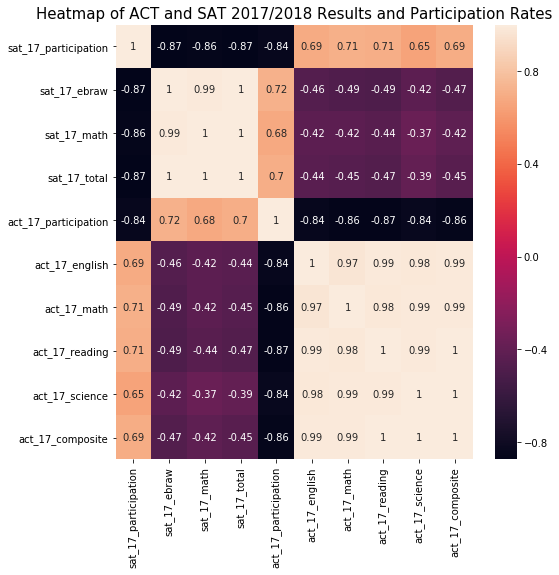

In [115]:
plt.figure(figsize=(8,8))
plt.axes().set_title('Heatmap of ACT and SAT 2017/2018 Results and Participation Rates',fontsize = 15)
sns.heatmap(results_2017.corr(),annot=True)

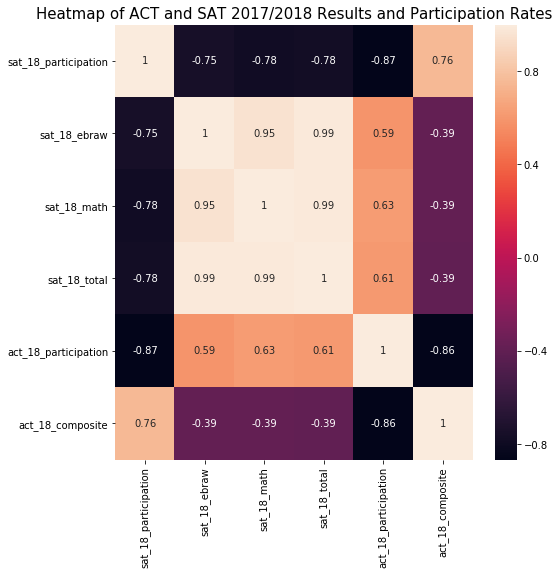

In [116]:
plt.figure(figsize=(8,8))
plt.axes().set_title('Heatmap of ACT and SAT 2017/2018 Results and Participation Rates',fontsize = 15)
sns.heatmap(results_2018.corr(),annot=True)

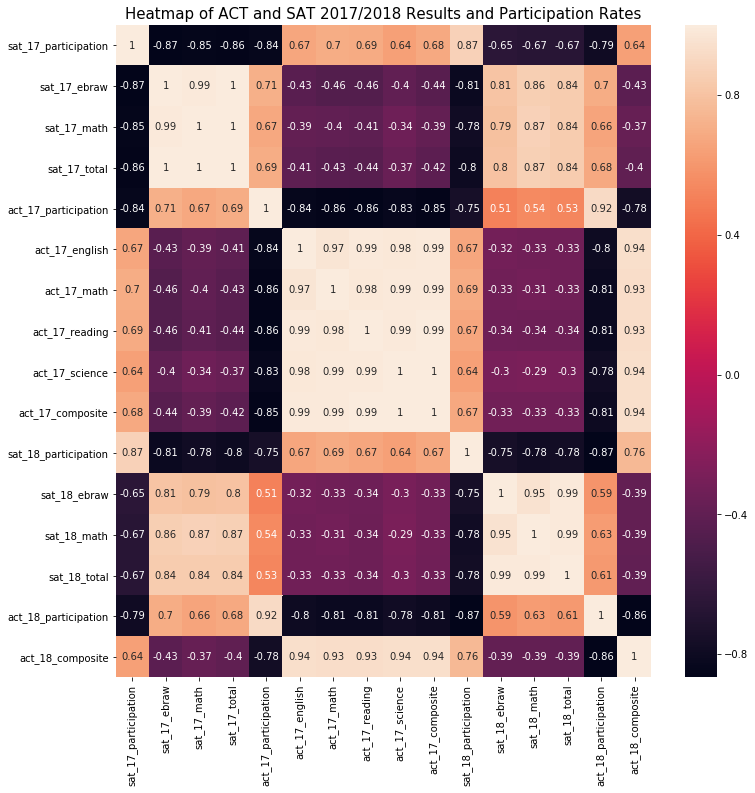

In [118]:
plt.figure(figsize=(12,12))
plt.axes().set_title('Heatmap of ACT and SAT 2017/2018 Results and Participation Rates',fontsize = 15)
sns.heatmap(final.corr(),annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(10,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

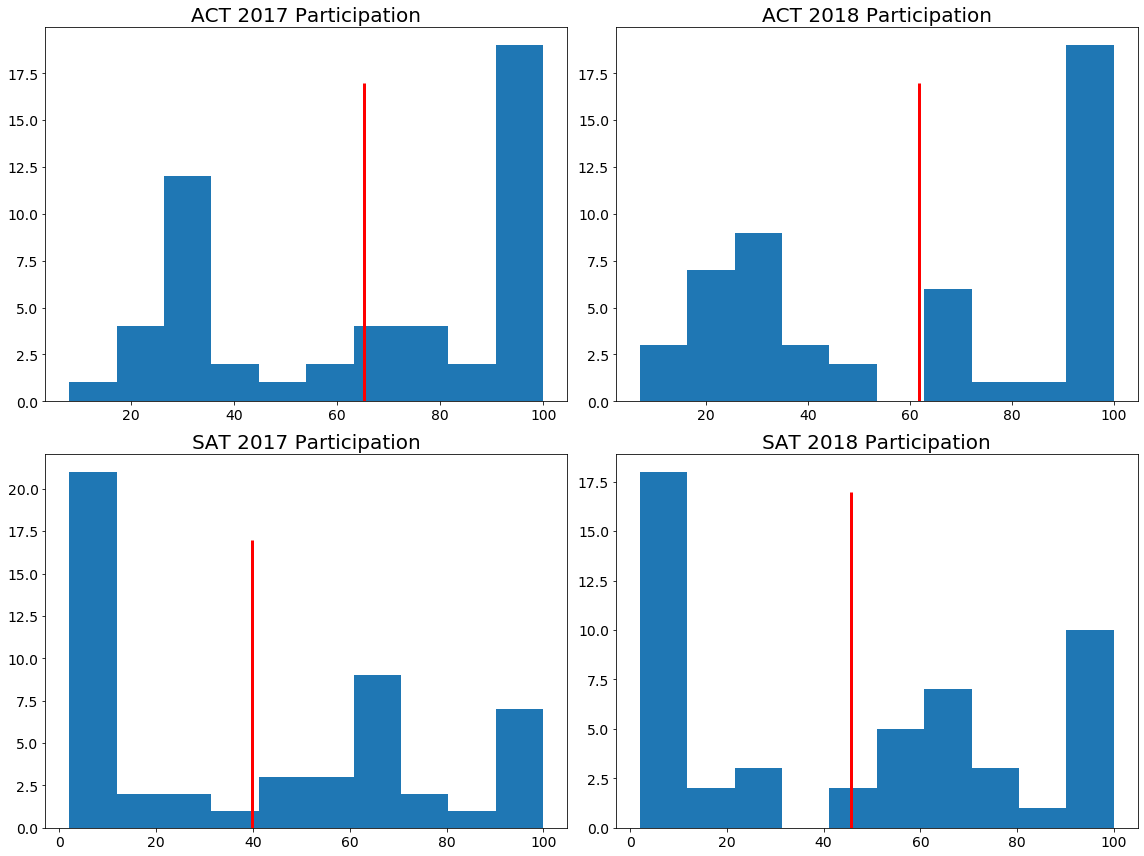

In [131]:
plt.figure(figsize = (16,12))

ax1 = plt.subplot(2, 2, 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('ACT 2017 Participation', fontsize = 20)
ax1.hist(act_2017['act_17_participation']);
ax1.vlines(x = np.mean(act_2017['act_17_participation']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

ax2 = plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('ACT 2018 Participation', fontsize = 20)
ax2.hist(act_2018['act_18_participation']);
ax2.vlines(x = np.mean(act_2018['act_18_participation']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

ax3 = plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('SAT 2017 Participation', fontsize = 20)
ax3.hist(sat_2017['sat_17_participation']);
ax3.vlines(x = np.mean(sat_2017['sat_17_participation']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

ax4 = plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('SAT 2018 Participation', fontsize = 20)
ax4.hist(sat_2018['sat_18_participation']);
ax4.vlines(x = np.mean(sat_2018['sat_18_participation']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

plt.tight_layout()

### We can see that ACT participation rate dropped while the SAT participation rate increased in 2018 when compared to the year before. But overall, if we looked at the mean of the distributions, ACT has a higher participation rate than SAT.

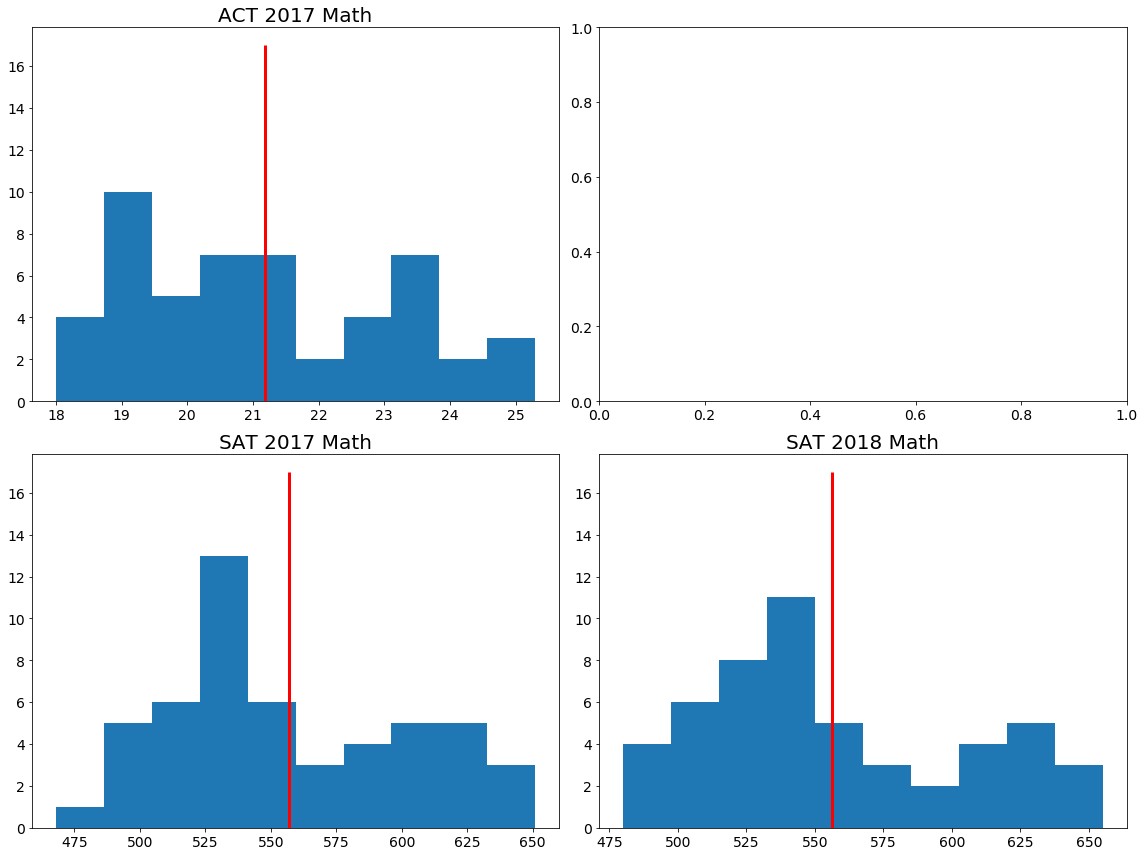

In [135]:
plt.figure(figsize = (16,12))

ax1 = plt.subplot(2, 2, 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('ACT 2017 Math', fontsize = 20)
ax1.hist(act_2017['act_17_math']);
ax1.vlines(x = np.mean(act_2017['act_17_math']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

ax2 = plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('ACT 2018 Participation', fontsize = 20)
# ax2.hist(act_2018['act_18_math']);
# ax2.vlines(x = np.mean(act_2018['act_18_math']),
#            ymin = 0,
#            ymax = 17,
#            color = 'r',
#            lw = 3)

ax3 = plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('SAT 2017 Math', fontsize = 20)
ax3.hist(sat_2017['sat_17_math']);
ax3.vlines(x = np.mean(sat_2017['sat_17_math']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

ax4 = plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('SAT 2018 Math', fontsize = 20)
ax4.hist(sat_2018['sat_18_math']);
ax4.vlines(x = np.mean(sat_2018['sat_18_math']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

plt.tight_layout()

### While there is minimal improvement in the average math results in SAT over the year, it is not possible to state any difference in ACT scores due to unavailability of data.

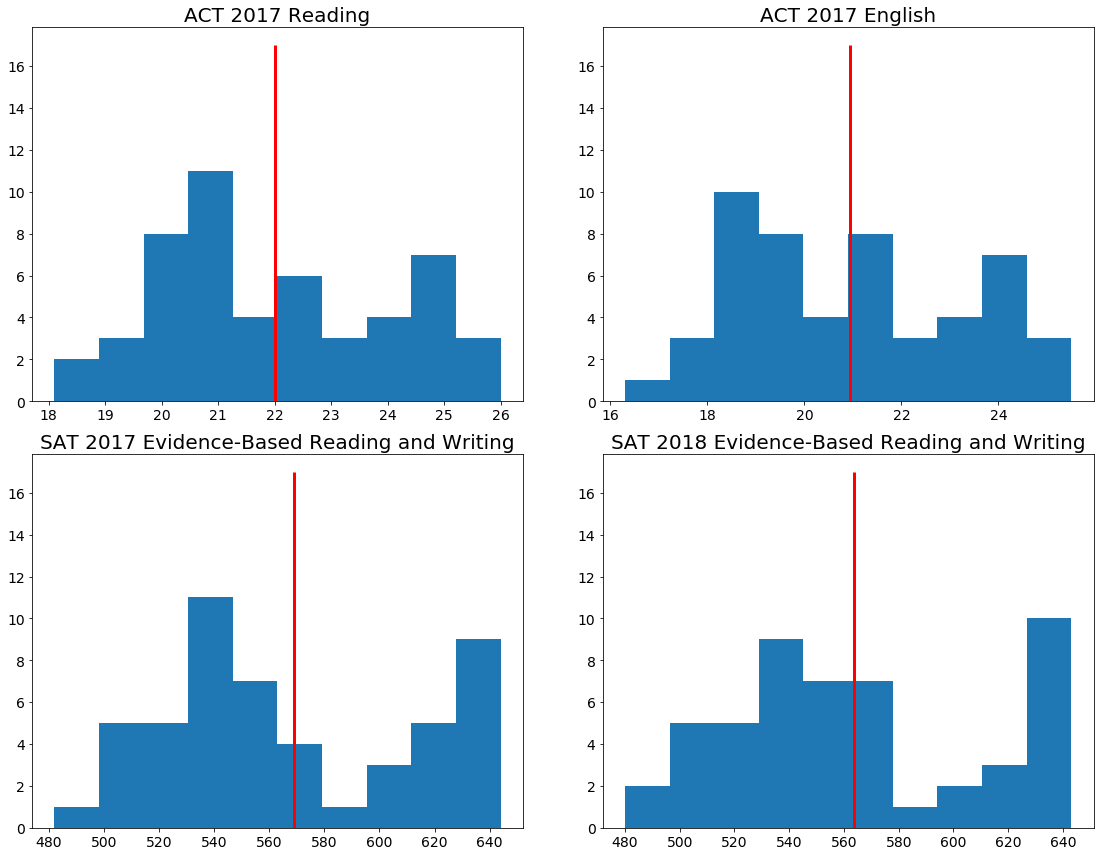

In [145]:
plt.figure(figsize = (16,12))

ax1 = plt.subplot(2, 2, 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('ACT 2017 Reading', fontsize = 20)
ax1.hist(act_2017['act_17_reading']);
ax1.vlines(x = np.mean(act_2017['act_17_reading']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

ax2 = plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('ACT 2017 English', fontsize = 20)
ax2.hist(act_2017['act_17_english']);
ax2.vlines(x = np.mean(act_2017['act_17_english']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

ax3 = plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('SAT 2017 Evidence-Based Reading and Writing', fontsize = 20)
ax3.hist(sat_2017['sat_17_ebraw']);
ax3.vlines(x = np.mean(sat_2017['sat_17_ebraw']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

ax4 = plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('SAT 2018 Evidence-Based Reading and Writing', fontsize = 20)
ax4.hist(sat_2018['sat_18_ebraw']);
ax4.vlines(x = np.mean(sat_2018['sat_18_ebraw']),
           ymin = 0,
           ymax = 17,
           color = 'r',
           lw = 3)

plt.tight_layout()

### It is observed that the average EBRW score has droppped in a year for the SAT, it is not possible to make the same observation in ACT results. The second subplot is used to observe the English scores of the participants, and not related to 2018 results anyhow.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [446]:
def scatterplotter(x, y, x_col, y_col, title):
    plt.figure(figsize=(16, 9))
    ax4 = plt.subplot(1, 1, 1)
    ax4.scatter(x[x_col], y[y_col])
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize = 20)
    for i, txt in enumerate(x['state']):
        ax4.annotate(txt, (x[x_col][i], y[y_col][i]), fontsize = 12)

# I tried playing around with annotation to see 
# the states clearly and how the pairs would show up on the scatter plot

    return plt.figure

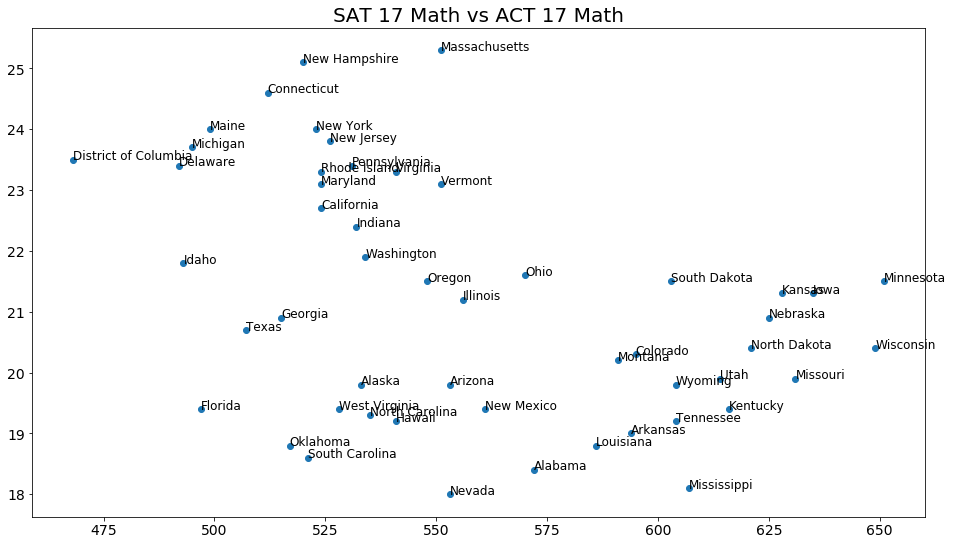

In [447]:
# Code
scatterplotter(sat_2017,act_2017,'sat_17_math','act_17_math','SAT 17 Math vs ACT 17 Math');

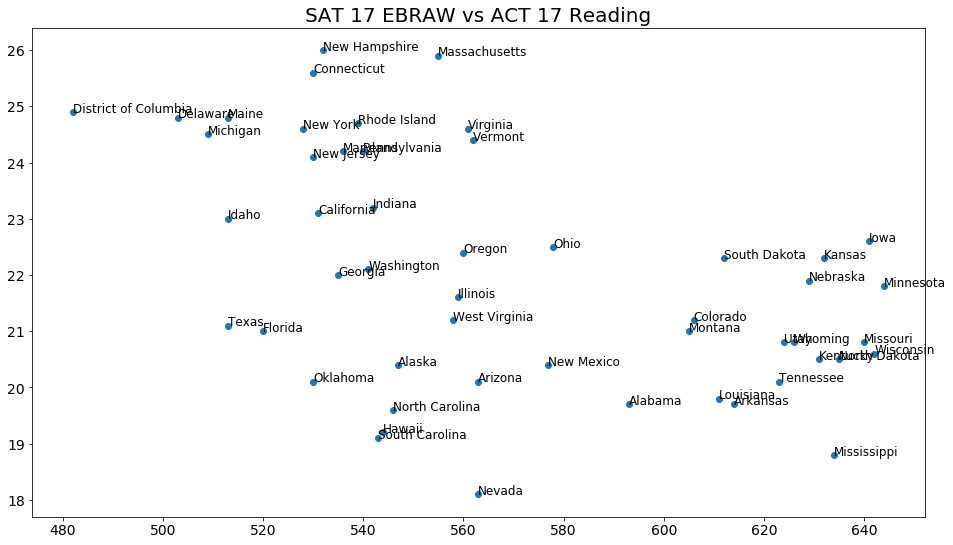

In [448]:
scatterplotter(sat_2017,act_2017,'sat_17_ebraw','act_17_reading','SAT 17 EBRAW vs ACT 17 Reading');

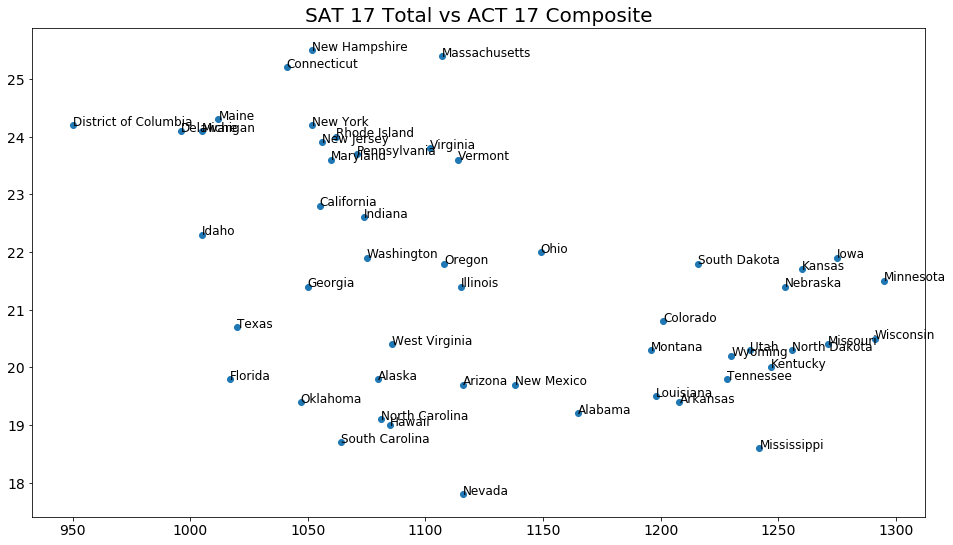

In [449]:
scatterplotter(sat_2017,act_2017,'sat_17_total','act_17_composite','SAT 17 Total vs ACT 17 Composite');

### With these scatterplots, I can easily observe which state did what kind of score on both exams. Thanks to the .annotate function,  I can observe the values that correspond to the states for both exams. These scatterplots could be related to the participation rates to find out what kind of consistency there is for the states.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [477]:
def boxplotter(data,datacol,color, axis):
    sns.boxplot(data[datacol], orient='v', color=color, ax=axes[axis], linewidth = 1.8)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

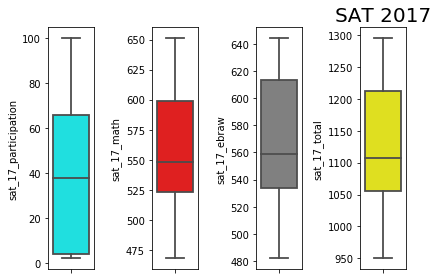

In [478]:
f, axes = plt.subplots(1,4)
boxplotter(sat_2017,'sat_17_participation','cyan',0)
boxplotter(sat_2017,'sat_17_math','red',1)
boxplotter(sat_2017,'sat_17_ebraw','grey',2)
boxplotter(sat_2017,'sat_17_total','yellow',3)
plt.title('SAT 2017', fontsize = 20)
plt.tight_layout()

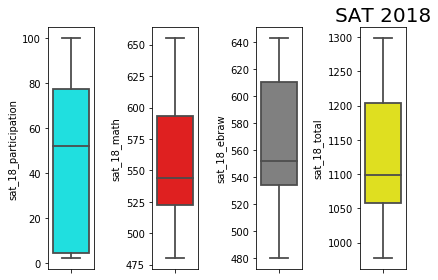

In [479]:
f, axes = plt.subplots(1,4)
boxplotter(sat_2018,'sat_18_participation','cyan',0)
boxplotter(sat_2018,'sat_18_math','red',1)
boxplotter(sat_2018,'sat_18_ebraw','grey',2)
boxplotter(sat_2018,'sat_18_total','yellow',3)
plt.title('SAT 2018', fontsize = 20)
plt.tight_layout()

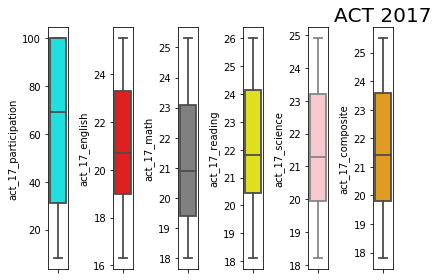

In [480]:
f, axes = plt.subplots(1,6)
boxplotter(act_2017,'act_17_participation','cyan',0)
boxplotter(act_2017,'act_17_english','red',1)
boxplotter(act_2017,'act_17_math','grey',2)
boxplotter(act_2017,'act_17_reading','yellow',3)
boxplotter(act_2017,'act_17_science','pink',4)
boxplotter(act_2017,'act_17_composite','orange',5)
plt.title('ACT 2017', fontsize = 20)
plt.tight_layout()

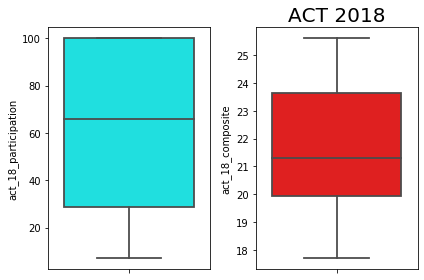

In [481]:
f, axes = plt.subplots(1,2)
boxplotter(act_2018,'act_18_participation','cyan',0)
boxplotter(act_2018,'act_18_composite','red',1)
plt.title('ACT 2018', fontsize = 20)
plt.tight_layout()

#### Box plots are an easy way to see the mean of every column as well as interquartile ranges and outliers. For some reason I was not able to see the outliers? (I have tried showfliers & fliersize)

#### For SAT exam over the year, we can see that as the participation rate rose, the total success mean dropped.

#### On the other hand, ACT exam participation rates were stable, therefore the composite mean did not change as well.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: